# 13. AMES HOUSING: DATASET EXPLORATION
---

## 1. Introducing the Dataset
- **Dataset:** Sold houses in Ames, Iowa
    - Download [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt)
    - The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. [Link](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)
    - Information about the columns in the dataset is [here](https://s3.amazonaws.com/dq-content/307/data_description.txt). It's also saved as a test file: `data/Ames_Housing_data_description`
- **Origin:** Compiled by [Dean de Cock](https://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing.txt', delimiter="\t")
print(ames.shape)
ames.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Understanding the Data Types
- 23 nominal, 
- 23 ordinal, 
- 14 discrete, and 
- 20 continuous

This makes a total of 80 columns but the dataset has 82. The reason is probably do to the fact that `Order` and `PID` are not really useful features for the purpose of model of design. They are just there to help us identify individual entries.

In [2]:
ames = ames.drop(['Order', 'PID'], axis=1)
print(ames.shape)
ames.dtypes.value_counts()

(2930, 80)


object     43
int64      26
float64    11
dtype: int64

## 3. Identifying the 20 Continuous Columns: 
#### can't be counted but can be measured
Let's start by identifying the 20 continuous data types. They are usually of the `float` type, however, we have 11 here. We need to find the other 9. We can use histograms, which will often show continuous intervals if the variable is continuous. Histograms of discrete variables often show a bar plot shape.

In [3]:
ames_float = ames.select_dtypes(include=['float64'])
ames_float.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,141.0,112.0,639.0,0.0,441.0,1080.0,1.0,0.0,1960.0,2.0,528.0
1,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
2,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
3,93.0,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,1968.0,2.0,522.0
4,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0


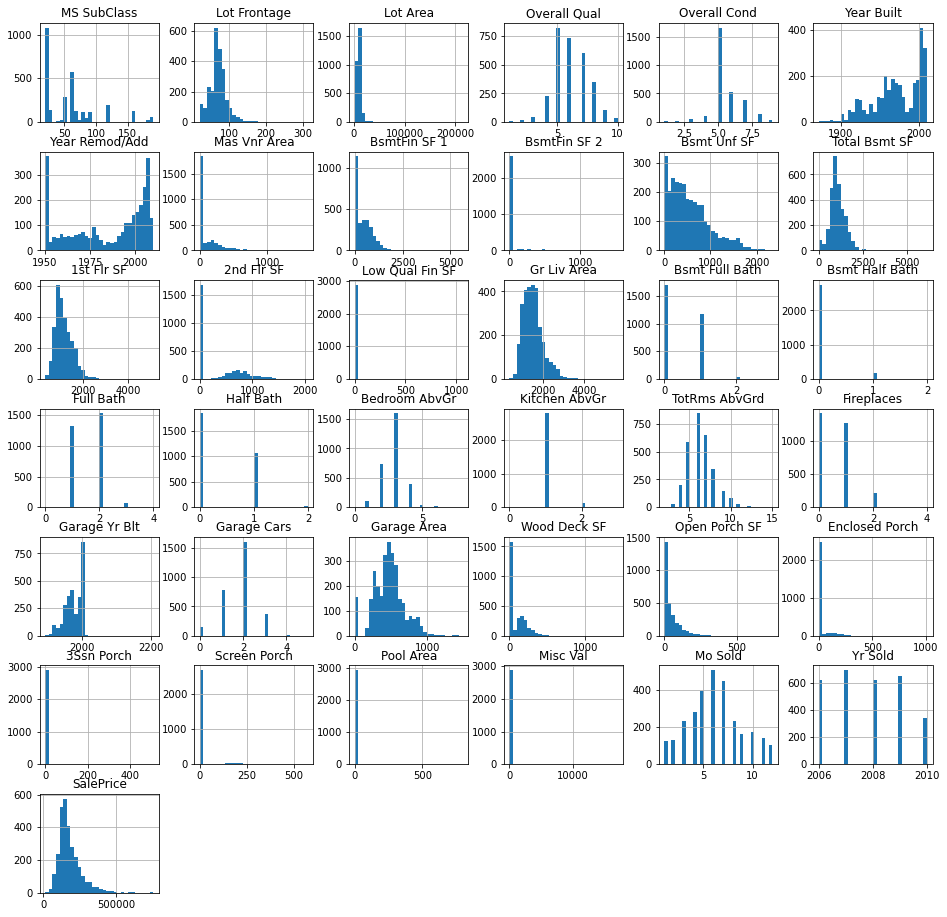

In [4]:
import matplotlib.pyplot as plt

ames.hist(bins=30, figsize=(16,16))
plt.show()

Let's create a list of what we believe are continuous columns solely based on how they histograms look. Then we can check each column description to confirm if its data type is continuous. If we find a column that's not on the list, we will add it if the description suggest it should be continuous

In [5]:
cont_cols = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
            'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 
             'Garage Yr Blt', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice']
float_cols = ames_float.columns

for item in float_cols: 
    if (item not in cont_cols): 
        cont_cols.append(item) 
print(len(cont_cols)) 

ames[cont_cols].head()

21


,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Yr Blt,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,BsmtFin SF 2,Bsmt Full Bath,Bsmt Half Bath,Garage Cars
0,20,141.0,31770,1960,1960,112.0,639.0,441.0,1080.0,1656,0,1656,1960.0,528.0,210,62,215000,0.0,1.0,0.0,2.0
1,20,80.0,11622,1961,1961,0.0,468.0,270.0,882.0,896,0,896,1961.0,730.0,140,0,105000,144.0,0.0,0.0,1.0
2,20,81.0,14267,1958,1958,108.0,923.0,406.0,1329.0,1329,0,1329,1958.0,312.0,393,36,172000,0.0,0.0,0.0,1.0
3,20,93.0,11160,1968,1968,0.0,1065.0,1045.0,2110.0,2110,0,2110,1968.0,522.0,0,0,244000,0.0,1.0,0.0,2.0
4,60,74.0,13830,1997,1998,0.0,791.0,137.0,928.0,928,701,1629,1997.0,482.0,212,34,189900,0.0,0.0,0.0,2.0


Let's now go to our data description to check which columns in our `con_cols` list should not be there:
- Columns to drop from our continuous list (`cont_cols`):
    - `MS SubClass`: Identifies the type of dwelling involved in the sale. `Nominal`
    - `Year Built`: Original construction date. `Discrete`
    - `Year Remod/Add`: Remodel date (same as construction date if no remodeling or additions). `Discrete`
    - `Garage Yr Blt`: Year garage was built. `Discrete`
    - `Garage Cars`: Size of garage in car capacity. `Discrete`
    - `Bsmt Full Bath`: Basement full bathrooms. `Discrete`
    - `Bsmt Half Bath`: Basement half bathrooms. `Discrete`
- Columns to add to our continuous list (`cont_cols`): 
    - `Low Qual Fin SF`: Low quality finished square feet (all floors)
    - `Enclosed Porch`: Enclosed porch area in square feet
    - `3Ssn Porch`: Three season porch area in square feet
    - `Screen Porch`: Screen porch area in square feet
    - `Pool Area`: Pool area in square feet
    - `Misc Val`: Value of miscellaneous feature (USD)    
- Note:
    - Discrete: can't be measured but it can be counted
    - Nominal: represent discrete units and are used to label variables, that have no quantitative value

In [11]:
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
              'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 
              'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice']

cont_add = ['Low Qual Fin SF', 'Enclosed Porch', '3Ssn Porch', 
            'Screen Porch', 'Pool Area', 'Misc Val']

for item in cont_add:
    if (item not in continuous):
        continuous.append(item)     

print('There are', len(continuous), 'continuous columns')  
ames[continuous].head()

There are 20 continuous columns


,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,Low Qual Fin SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,141.0,31770.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,1656.0,528.0,210.0,62.0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,11622.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,896.0,730.0,140.0,0.0,105000.0,0.0,0.0,0.0,120.0,0.0,0.0
2,81.0,14267.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,1329.0,312.0,393.0,36.0,172000.0,0.0,0.0,0.0,0.0,0.0,12500.0
3,93.0,11160.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,2110.0,522.0,0.0,0.0,244000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74.0,13830.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,1629.0,482.0,212.0,34.0,189900.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
ames[continuous] = ames[continuous].astype('float')
ames[continuous].dtypes

Lot Frontage       float64
Lot Area           float64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF         float64
2nd Flr SF         float64
Gr Liv Area        float64
Garage Area        float64
Wood Deck SF       float64
Open Porch SF      float64
SalePrice          float64
Low Qual Fin SF    float64
Enclosed Porch     float64
3Ssn Porch         float64
Screen Porch       float64
Pool Area          float64
Misc Val           float64
dtype: object

In [13]:
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
              'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
              'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Low Qual Fin SF', 'Enclosed Porch', 
              '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

all_cols = ames.columns
other_cols = []
for col in all_cols:
    if col not in continuous:
        other_cols.append(col)
ames[other_cols].head()

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,TA,TA,P,NaN,NaN,NaN,5,2010,WD,Normal
1,20,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,TA,TA,Y,NaN,MnPrv,NaN,6,2010,WD,Normal
2,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,TA,TA,Y,NaN,NaN,Gar2,6,2010,WD,Normal
3,20,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,TA,TA,Y,NaN,NaN,NaN,4,2010,WD,Normal
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,TA,TA,Y,NaN,MnPrv,NaN,3,2010,WD,Normal


## 4. Identifying the 14 Discrete Columns
- **can't be measure but can be counted**
    - `Year Built`: Original construction date. 
    - `Year Remod/Add`: Remodel date (same as construction date if no remodeling or additions). 
    - `Garage Yr Blt`: Year garage was built. 
    - `Garage Cars`: Size of garage in car capacity. 
    - `Bsmt Full Bath`: Basement full bathrooms
    - `Bsmt Half Bath`: Basement half bathrooms
    - `Full Bath`: Full bathrooms above grade
    - `Half Bath`: Half baths above grade
    - `Bedroom AbvGr`: Bedrooms above grade (does NOT include basement bedrooms)
    - `Kitchen AbvGr`: Kitchens above grade
    - `TotRms AbvGrd`: Total rooms above grade (does not include bathrooms)
    - `Fireplaces`: Number of fireplaces
    - `Mo Sold`: Month Sold (MM)
    - `Yr Sold`: Year Sold (YYYY)

In [20]:
discrete = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath',
           'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
           'TotRms AbvGrd', 'Fireplaces', 'Mo Sold', 'Yr Sold']
print(len(discrete))
ames[discrete].head()

14


,Year Built,Year Remod/Add,Garage Yr Blt,Garage Cars,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Mo Sold,Yr Sold
0,1960,1960,1960.0,2.0,1.0,0.0,1,0,3,1,7,2,5,2010
1,1961,1961,1961.0,1.0,0.0,0.0,1,0,2,1,5,0,6,2010
2,1958,1958,1958.0,1.0,0.0,0.0,1,1,3,1,6,0,6,2010
3,1968,1968,1968.0,2.0,1.0,0.0,2,1,3,1,8,2,4,2010
4,1997,1998,1997.0,2.0,0.0,0.0,2,1,3,1,6,1,3,2010


## 5. Identifying the 23 Ordinal Columns
- **can be counted (but not measured) and are ordered**
    - `Lot Shape`: General shape of property (reg, irreg 1, irreg 2, irreg 3)
    - `Land Slope`: Slope of property (gentle, moderate, severe)
    - `Overall Qual`: Rates the overall material and finish of the house (1-10)
    - `Overall Cond`: Rates the overall condition of the house
    - `Exter Qual`: Evaluates the quality of the material on the exterior 
    - `Exter Cond`: Evaluates the present condition of the material on the exterior
    - `Bsmt Qual`: Evaluates the height of the basement
    - `Bsmt Cond`: Evaluates the general condition of the basement
    - `Bsmt Exposure`: Refers to walkout or garden level walls
    - `BsmtFin Type 1`: Rating of basement finished area
    - `BsmtFin Type 2`: Rating of basement finished area (if multiple types)
    - `Heating QC`: Heating quality and condition
    - `Kitchen Qual`: Kitchen quality
    - `Functional`: Home functionality (Assume typical unless deductions are warranted)
    - `Fireplace Qu`: Fireplace quality
    - `Garage Finish`: Interior finish of the garage
    - `Garage Qual`: Garage quality
    - `Garage Cond`: Garage condition
    - `Pool QC`: Pool quality
    - `Central Air`: Central air conditioning
    - `Paved Drive`: Paved driveway
    - `Fence`: Fence quality
    - `Sale Condition`: Condition of sale

In [15]:
ordinal = ['Lot Shape', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond',
           'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond',
           'Pool QC', 'Central Air', 'Paved Drive', 'Fence', 'Sale Condition']
len(ordinal)

23

## 6. Identifying the 23 Nominal Columns
- **just labels, with no order**
    - `MS SubClass`: Identifies the type of dwelling involved in the sale.
    - `MS Zoning`: Identifies the general zoning classification of the sale.
    - `Street`: Type of road access to property
    - `Alley`: Type of alley access to property
    - `Lot Shape`: General shape of property
    - `Land Contour`: Flatness of the property
    - `Utilities`: Type of utilities available
    - `Lot Config`: Lot configuration
    - `Neighborhood`: Physical locations within Ames city limits
    - `Condition1`: Proximity to various conditions
    - `Condition2`: Proximity to various conditions (if more than one is present)
    - `BldgType`: Type of dwelling
    - `House Style`: Style of dwelling
    - `Roof Style`: Type of roof
    - `Roof Matl`: Roof material
    - `Exterior 1st`: Exterior covering on house
    - `Exterior 2nd`: Exterior covering on house (if more than one material)
    - `Mas Vnr Type`: Masonry veneer type
    - `Foundation`: Type of foundation    
    - `Electrical`: Electrical system
    - `Garage Type`: Garage location    - 
    - `Misc Feature`: Miscellaneous feature not covered in other categories
    - `Sale Type`: Type of sale

In [16]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
          'Lot Config', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'House Style',
          'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
          'Electrical', 'Garage Type', 'Misc Feature', 'Sale Type']
len(nominal)

23

In [17]:
ames.dtypes.value_counts()

object     43
float64    24
int64      13
dtype: int64

## 7. Train-Test Splitting

In [21]:
ames.shape

(2930, 80)

In [24]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   float64
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ames, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(2344, 80) (586, 80)


In [23]:
ames.to_csv('data/Ames_Housing1_80cols', index=False)
train.to_csv('data/Ames_Housing1_train', index=False)
test.to_csv('data/Ames_Housing1_test', index=False)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656.0,0.0,0.0,1656.0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210.0,62.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5,2010,WD,Normal,215000.0
1,20,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NaN,MnPrv,NaN,0.0,6,2010,WD,Normal,105000.0
2,20,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,Gar2,12500.0,6,2010,WD,Normal,172000.0
3,20,RL,93.0,11160.0,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110.0,0.0,0.0,2110.0,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,4,2010,WD,Normal,244000.0
4,60,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,3,2010,WD,Normal,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937.0,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003.0,0.0,0.0,1003.0,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120.0,0.0,0.0,0.0,0.0,0.0,NaN,GdPrv,NaN,0.0,3,2006,WD,Normal,142500.0
2926,20,RL,NaN,8885.0,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902.0,0.0,0.0,902.0,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164.0,0.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,6,2006,WD,Normal,131000.0
2927,85,RL,62.0,10441.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337

We are done with dataset exploration. Let's now move on to `EXPLORATIVE DATA ANALYSIS` in the next chapter